# import libraries

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

from datetime import datetime, timedelta
from pandas.plotting import scatter_matrix
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier 
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

# load datasets

In [2]:
df = pd.read_csv('merged_data_labeled.csv')

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_7725/2157743691.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_data_labeled.csv')


In [3]:
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-72.0,68.0,-38.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.000000000,2.0
1,-18.0,74.0,-21.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.031249920,2.0
2,-17.0,69.0,-36.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.062500096,2.0
3,-27.0,57.0,-20.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.093750016,2.0
4,7.0,61.0,1.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.124999936,2.0


In [16]:
#+ ACC -> Accelerometer
#-? BVP -> The volume of blood that passes through the tissues in the wrist and is used to measure IBI and Heart Rate
#+ HR -> Heart Rate
#+ EDA -> Measurement of the skin conductivity levels
#-? IBI -> Time interval
#+ TEMP -> Skin Temperature

In [17]:
# check na
df.isna().sum() 

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [18]:
inputExcelFile ='SurveyResults.xlsx'

# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)

# Converting excel file into CSV file
excelFile.to_csv ("SurveyResults.csv", index = None, header=True)

# Reading and Converting the output csv file into a dataframe object
survey_results = pd.DataFrame(pd.read_csv("SurveyResults.csv"))

In [19]:
survey_results.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [20]:
survey_results['Stress level'].unique()

array(['1', '2', 'na', '0'], dtype=object)

In [21]:
# 0 -> no stress
# 1 -> low stress
# 2 -> high stress

# Stress Level - Reasons

In [22]:
covid_related = (survey_results["COVID related"] == '1').sum()
covid_patient = (survey_results["Treating a covid patient"] == '1').sum()
patient_crises = (survey_results["Patient in Crisis"] == '1').sum()
patients_family =(survey_results["Patient or patient's family"] == '1').sum()
colleagues = (survey_results["Doctors or colleagues"] == '1').sum()
workload = (survey_results["Increased Workload"] == '1').sum()

In [23]:
arr_counts = [covid_related, covid_patient, patient_crises, patients_family, colleagues, workload]
arr_reasons = ['c related', 'c patient', 'p crises', 'p family', 'colleagues', 'workload']

<BarContainer object of 6 artists>

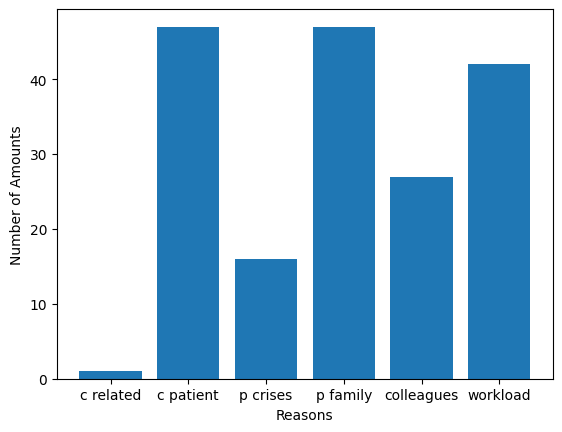

In [24]:
plt.xticks(range(len(arr_counts)), arr_reasons)
plt.xlabel('Reasons')
plt.ylabel('Number of Amounts')
plt.bar(arr_reasons, arr_counts, align='center')

In [25]:
print('There is only', covid_related ,'one nurse who stress happened because of covid')

There is only 1 one nurse who stress happened because of covid


# Stress Level range

In [28]:
reason_0 = (df["label"] == 0).value_counts()
reason_0_0 = reason_0.iloc[1]
reason_1 = (df["label"] == 1).value_counts()
reason_0_1 = reason_1.iloc[1]
reason_2 = (df["label"] == 2).value_counts()
reason_0_2 = reason_2.iloc[1]
arr_counts_2 = [reason_0_0, reason_0_1, reason_0_2]
arr_col = ['0', '1', '2']

In [29]:
arr_counts_2

[2162246, 806222, 2968468]

<BarContainer object of 3 artists>

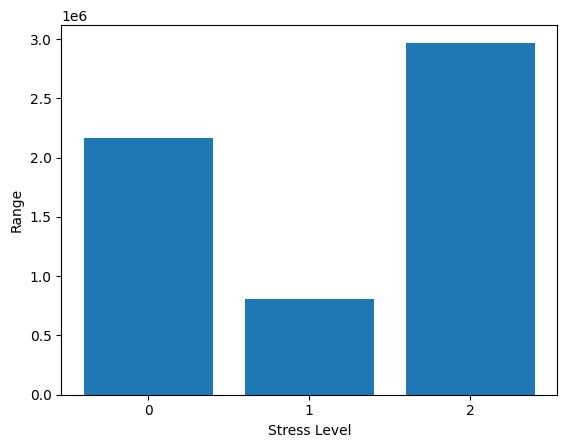

In [30]:
arr_reasons_012 = ['0', '1', '2']
plt.xticks(range(len(arr_counts_2)), arr_reasons_012)
plt.xlabel('Stress Level')
plt.ylabel('Range')
plt.bar(arr_reasons_012, arr_counts_2)

In [3]:
# nurses
nurses= df.id.unique()
nurses

array([94, '94', 'DF', 'F5', 'E4', '7E', '6B', '5C', '6D', 'BG', 'EG',
       'CE', '83', 83, 15, '15', '8B', '7A'], dtype=object)

In [4]:
df['id'] = df['id'].apply(str)
df.id.unique()

array(['94', 'DF', 'F5', 'E4', '7E', '6B', '5C', '6D', 'BG', 'EG', 'CE',
       '83', '15', '8B', '7A'], dtype=object)

# Correlation Matrix

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_2404/2240156585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


<AxesSubplot: >

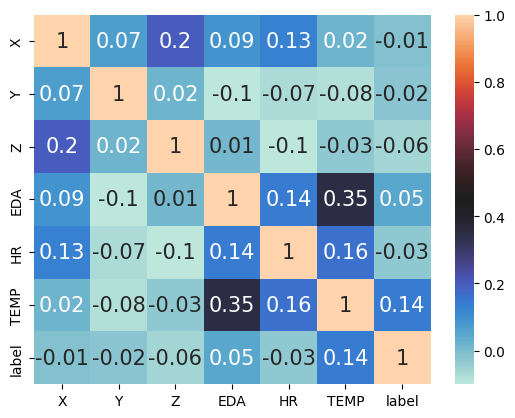

In [34]:
data = df.corr()
sns.heatmap(round(data,2), cmap="icefire", annot=True, annot_kws={'size': 15})

# Boxplot of HR and nurses

avarage HR is:  85.76
maximum HR is:  180.23
minumum HR is:  51.0


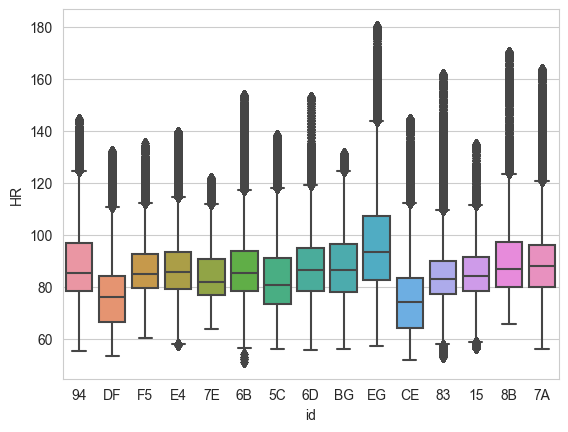

In [35]:
sns.set_style("whitegrid")
  
sns.boxplot(x = df['id'], y = df['HR'], data = df)
print('avarage HR is: ', round(df['HR'].mean(), 2))
print('maximum HR is: ', round(df['HR'].max(), 2))
print('minumum HR is: ', round(df['HR'].min(), 2))

# Day, Month, HR HeatMap

In [36]:
df_time_splited = df.copy()

In [37]:
time = df_time_splited.iloc[:, 7:8]
time['Dates'] = pd.to_datetime(time['datetime']).dt.date
time['Time'] = pd.to_datetime(time['datetime']).dt.time
time = time.drop('datetime', axis=1)

In [38]:
del df_time_splited['datetime']

In [39]:
df_time_splited['Dates'] = time['Dates']
df_time_splited['Time'] = time['Time']

In [40]:
# split dates in to year, month, day
df_time_splited[["year", "month", "day"]] = df_time_splited["Dates"].astype(str).str.split("-", expand = True)

In [41]:
# match day, month to HR
arr=np.zeros((12,31))
for i in df_time_splited.Dates.unique():
    mean = df_time_splited[df_time_splited.Dates==i]['HR'].mean()
    day = i.day
    month = i.month
    arr[month-1, day-1] = mean

In [42]:
type(df_time_splited.Dates[1])

datetime.date

In [43]:
df_time_splited.Dates[1]

datetime.date(2020, 5, 10)

<AxesSubplot: >

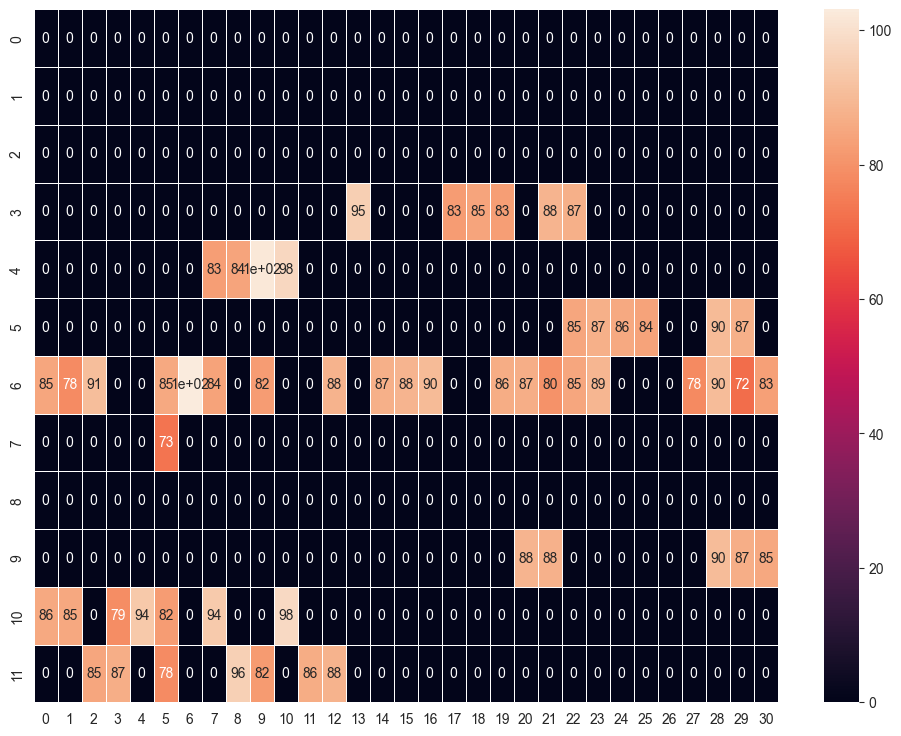

In [44]:
a4_dims = (12, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.heatmap(np.round(arr ,2), annot=True, linewidth=.5)

# Day, Month, Stress level Heatmap

In [45]:
# split dates in to year, month, day
survey_results[["year", "month", "day"]] = survey_results["date"].str.split("-", expand = True)

In [46]:
survey_results.date = pd.to_datetime(survey_results.date)

In [47]:
survey_results['Stress level'].replace({'na': None}, inplace=True)

In [48]:
survey_results.dropna(axis=0, inplace= True)

In [49]:
survey_results['Stress level'] = survey_results['Stress level'].astype(int)

In [50]:
# match day, month to HR
arr2=np.zeros((12,31))
for i in survey_results.date.unique():
    stress_level = survey_results[(survey_results.date)==i]['Stress level'].mean()
    i = pd.to_datetime(i)
    day = i.day
    month = i.month
    arr2[month-1, day-1] = stress_level

<AxesSubplot: >

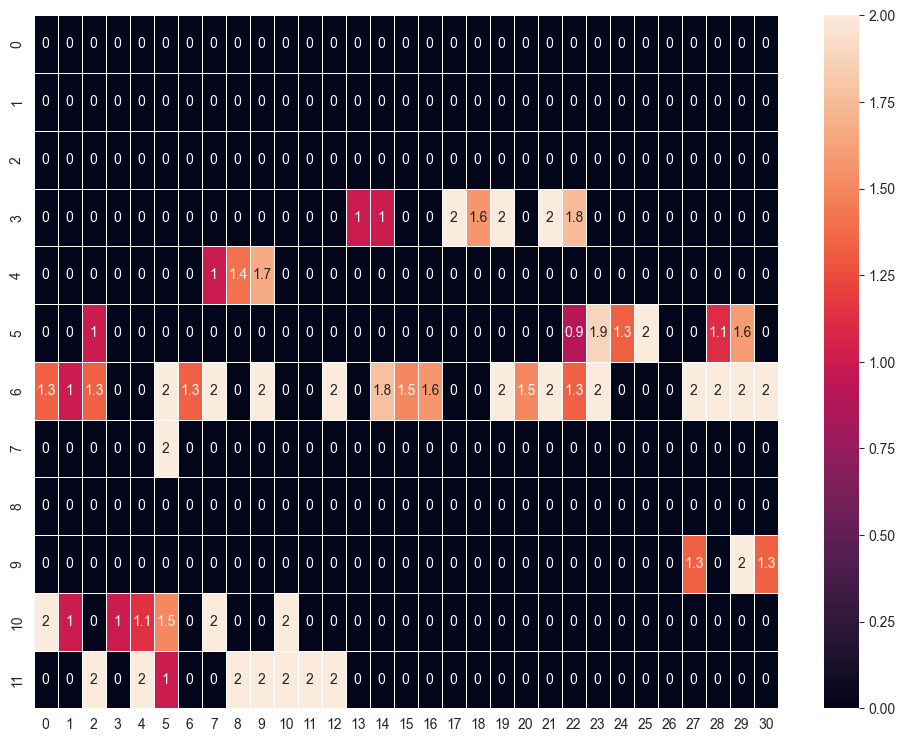

In [51]:
a4_dims = (12, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.heatmap(np.round(arr2 ,2), annot=True, linewidth=.5)

# statistical features


In [52]:
def statistical_features(arr):
    vmin = np.amin(arr)
    vmax = np.amax(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    return vmin, vmax, mean, std

In [53]:
def shape_features(arr):
    skewness = skew(arr)
    kurt = kurtosis(arr)
    return skewness, kurt

In [55]:
df.iloc[:, 3:6]

,EDA,HR,TEMP
0,22.903978,90.85,35.73
1,22.903978,90.85,35.73
2,22.903978,90.85,35.73
3,22.903978,90.85,35.73
4,22.903978,90.85,35.73
...,...,...,...
11509046,1.542354,76.90,31.65
11509047,1.542354,76.90,31.65
11509048,1.542354,76.90,31.65
11509049,1.542354,76.90,31.65


In [100]:
cols = [
    'EDA_Mean','EDA_Min','EDA_Max','EDA_Std', 'EDA_Kurtosis', 'EDA_Skew','EDA_Num_Peaks','EDA_Amphitude','EDA_Duration',
    'HR_Mean','HR_Min','HR_Max','HR_Std','HR_RMS','temp_Mean', 'temp_Min','temp_Max','temp_Std'
]
array = df_original.iloc[:, 3:6].values
data1 = pd.DataFrame(array)
df_features = pd.DataFrame(columns=cols)
data1.columns = ['EDA','HR','TEMP']
index = 0

In [107]:
for i in tqdm (range (0,len(data1['EDA']), 20)):
    df_partial = df_original.iloc[i:i+40,]
    plen = len(df_partial['EDA'])
    
    if plen < 40:
        continue
    
    eda = df_partial['EDA'].values
    hr = df_partial['HR'].values
    temp = df_partial['TEMP'].values

    eda_min, eda_max, eda_mean, eda_std = statistical_features(eda)
    hr_min, hr_max, hr_mean, hr_std = statistical_features(hr)
    temp_min, temp_max, temp_mean, temp_std = statistical_features(temp)
    eda_skew, eda_kurtosis = shape_features(eda)
    
    hr_rms = np.sqrt(np.mean(np.square(np.ediff1d(hr))))
    temp_rms= np.sqrt(np.mean(np.square(np.ediff1d(temp))))

    peaks,properties = find_peaks(eda, width=5)
    num_Peaks = len(peaks)
    
    prominences = np.array(properties['prominences'])
    widths = np.array(properties['widths'])
    amphitude = np.sum(prominences)
    duration = np.sum(widths)

    df_features.loc[index] = [eda_mean, eda_min, eda_max, eda_std, eda_kurtosis, eda_skew, num_Peaks, amphitude, duration, hr_mean, hr_min, hr_max, hr_std,hr_rms, temp_mean, temp_min, temp_max, temp_std]

    index = index+1

  2%|▋                                | 11787/575453 [01:36<1:18:12, 120.12it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  5%|█▋                               | 29676/575453 [03:58<1:07:02, 135.67it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

  5%|█▋                               | 29844/575453 [04:00<1:09:26, 130.97it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

  5%|█▋                               | 30069/575453 [04:01<1:09:43, 130.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  5%|█▋                               | 30098/575453 [04:02<1:07:10, 135.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

  5%|█▋                               | 30476/575453 [04:04<1:07:52, 133.82it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

  7%|██▍                              | 41594/575453 [05:30<1:10:32, 126.12it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  7%|██▍                              | 41887/575453 [05:32<1:09:36, 127.76it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

  8%|██▋                              | 46036/575453 [06:05<1:09:58, 126.10it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  8%|██▋                              | 46228/575453 [06:07<1:10:28, 125.14it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

  8%|██▊                              | 48593/575453 [06:25<1:08:02, 129.04it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  8%|██▊                              | 48660/575453 [06:26<1:08:39, 127.89it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

  9%|██▉                              | 51821/575453 [06:51<1:09:26, 125.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
  9%|██▉                              | 52129/575453 [06:53<1:11:56, 121.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 10%|███▍                             | 60387/575453 [08:01<1:09:20, 123.80it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 11%|███▌                             | 61401/575453 [08:09<1:10:01, 122.35it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 11%|███▌                             | 62999/575453 [08:22<1:09:17, 123.27it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 11%|███▌                             | 63077/575453 [08:23<1:10:29, 121.15it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 12%|███▊                             | 66249/575453 [08:50<1:14:33, 113.84it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 12%|███▊                             | 66426/575453 [08:51<1:09:09, 122.68it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 12%|███▉                             | 68973/575453 [09:12<1:12:34, 116.31it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 12%|████                             | 70508/575453 [09:25<1:13:22, 114.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 12%|████                             | 70959/575453 [09:29<1:09:51, 120.35it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 13%|████▏                            | 72721/575453 [09:44<1:12:31, 115.54it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 13%|████▏                            | 72733/575453 [09:44<1:11:48, 116.67it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 14%|████▌                            | 78869/575453 [10:36<1:13:02, 113.30it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 16%|█████▍                           | 94649/575453 [12:54<1:09:26, 115.40it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 21%|██████▋                         | 121274/575453 [17:05<1:11:17, 106.18it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 23%|███████▍                        | 133049/575453 [18:57<1:11:52, 102.58it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 23%|███████▍                        | 133060/575453 [18:57<1:11:35, 102.99it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 25%|███████▉                        | 142459/575453 [20:29<1:10:26, 102.46it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 27%|████████▉                        | 155209/575453 [22:38<1:14:55, 93.47it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 31%|██████████                       | 175600/575453 [26:11<1:10:32, 94.48it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 32%|██████████▋                      | 186921/575453 [28:12<1:07:27, 96.00it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 32%|██████████▋                      | 186961/575453 [28:12<1:13:51, 87.67it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 33%|██████████▊                      | 188380/575453 [28:28<1:08:43, 93.86it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 33%|██████████▊                      | 188950/575453 [28:34<1:08:03, 94.66it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 34%|███████████▎                     | 197476/575453 [30:07<1:07:56, 92.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 41%|█████████████▍                   | 234232/575453 [37:40<1:07:19, 84.46it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▍                   | 234383/575453 [37:42<1:06:33, 85.40it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▍                   | 234833/575453 [37:48<1:10:06, 80.98it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▍                   | 234869/575453 [37:48<1:13:30, 77.22it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▍                   | 235083/575453 [37:51<1:11:44, 79.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▍                   | 235092/575453 [37:51<1:10:36, 80.34it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▌                   | 235758/575453 [37:59<1:06:21, 85.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▌                   | 235821/575453 [38:00<1:07:22, 84.02it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▌                   | 236325/575453 [38:06<1:06:42, 84.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▌                   | 236334/575453 [38:06<1:11:28, 79.08it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▌                   | 236658/575453 [38:10<1:06:17, 85.17it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▌                   | 236676/575453 [38:10<1:11:34, 78.89it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▌                   | 237279/575453 [38:17<1:07:59, 82.89it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▌                   | 237288/575453 [38:17<1:07:50, 83.08it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▋                   | 238096/575453 [38:27<1:08:05, 82.58it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▋                   | 238123/575453 [38:27<1:06:53, 84.05it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 41%|█████████████▋                   | 238726/575453 [38:35<1:11:29, 78.51it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 41%|█████████████▋                   | 238735/575453 [38:35<1:10:13, 79.91it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▋                   | 238924/575453 [38:37<1:06:26, 84.41it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▋                   | 238933/575453 [38:37<1:06:30, 84.34it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▋                   | 239320/575453 [38:42<1:07:42, 82.73it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▋                   | 239374/575453 [38:42<1:06:14, 84.56it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▊                   | 239932/575453 [38:49<1:06:51, 83.63it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▊                   | 239941/575453 [38:49<1:06:38, 83.90it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▊                   | 240751/575453 [38:59<1:05:59, 84.53it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 42%|█████████████▊                   | 241057/575453 [39:03<1:08:18, 81.58it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▊                   | 241066/575453 [39:03<1:08:21, 81.53it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▊                   | 241354/575453 [39:06<1:09:49, 79.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▊                   | 241426/575453 [39:07<1:06:11, 84.11it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▉                   | 242632/575453 [39:22<1:07:46, 81.84it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▉                   | 242650/575453 [39:22<1:06:48, 83.03it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▉                   | 242820/575453 [39:24<1:10:58, 78.12it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 42%|█████████████▉                   | 242928/575453 [39:26<1:05:30, 84.60it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 42%|█████████████▉                   | 243647/575453 [39:34<1:07:30, 81.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 42%|██████████████                   | 244141/575453 [39:40<1:07:51, 81.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 43%|██████████████                   | 244787/575453 [39:49<1:10:52, 77.76it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████                   | 244795/575453 [39:49<1:10:32, 78.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████                   | 245013/575453 [39:52<1:10:54, 77.66it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████                   | 245039/575453 [39:52<1:07:43, 81.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████                   | 245515/575453 [39:58<1:06:31, 82.66it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████                   | 245524/575453 [39:58<1:06:16, 82.96it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████                   | 246018/575453 [40:04<1:08:53, 79.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 43%|██████████████▏                  | 246333/575453 [40:08<1:05:34, 83.65it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████▏                  | 246387/575453 [40:08<1:07:07, 81.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████▏                  | 247277/575453 [40:19<1:07:57, 80.49it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████▏                  | 247304/575453 [40:20<1:06:24, 82.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████▏                  | 247770/575453 [40:25<1:05:44, 83.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████▏                  | 247779/575453 [40:25<1:05:26, 83.45it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 43%|██████████████▎                  | 248513/575453 [40:35<1:11:09, 76.57it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████▎                  | 249150/575453 [40:42<1:06:20, 81.97it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 43%|██████████████▎                  | 249617/575453 [40:48<1:05:15, 83.22it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 44%|██████████████▎                  | 250435/575453 [40:58<1:05:26, 82.77it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 44%|██████████████▎                  | 250462/575453 [40:58<1:08:07, 79.51it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 44%|██████████████▍                  | 250847/575453 [41:03<1:06:19, 81.58it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 44%|██████████████▍                  | 251350/575453 [41:09<1:04:58, 83.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 44%|██████████████▍                  | 252168/575453 [41:20<1:08:01, 79.20it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 44%|██████████████▍                  | 252276/575453 [41:21<1:08:56, 78.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 45%|██████████████▋                  | 256759/575453 [42:16<1:05:25, 81.18it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 45%|██████████████▋                  | 256804/575453 [42:17<1:04:53, 81.84it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 45%|██████████████▋                  | 257198/575453 [42:22<1:05:38, 80.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 45%|██████████████▋                  | 257207/575453 [42:22<1:05:29, 81.00it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 45%|██████████████▊                  | 257737/575453 [42:29<1:08:27, 77.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 45%|██████████████▊                  | 257908/575453 [42:31<1:05:00, 81.42it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 45%|██████████████▊                  | 258321/575453 [42:36<1:06:14, 79.80it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 45%|██████████████▊                  | 258660/575453 [42:40<1:07:18, 78.44it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 45%|██████████████▉                  | 259773/575453 [42:54<1:09:43, 75.46it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 45%|██████████████▉                  | 259809/575453 [42:54<1:05:11, 80.70it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 46%|███████████████▏                 | 264426/575453 [43:57<1:09:24, 74.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 46%|███████████████▏                 | 264658/575453 [44:00<1:09:22, 74.66it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 46%|███████████████▎                 | 265957/575453 [44:19<1:11:48, 71.83it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 46%|███████████████▎                 | 266365/575453 [44:25<1:08:55, 74.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 47%|███████████████▎                 | 267598/575453 [44:42<1:12:58, 70.30it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 47%|███████████████▎                 | 267725/575453 [44:44<1:08:15, 75.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 47%|███████████████▍                 | 268284/575453 [44:53<1:18:24, 65.29it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 47%|███████████████▍                 | 268311/575453 [44:53<1:27:33, 58.47it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 47%|███████████████▌                 | 270884/575453 [45:30<1:15:14, 67.46it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 47%|███████████████▌                 | 270999/575453 [45:31<1:10:55, 71.54it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 49%|████████████████▏                | 281781/575453 [48:04<1:07:18, 72.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 49%|████████████████▏                | 282109/575453 [48:09<1:08:54, 70.94it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 49%|████████████████▎                | 284309/575453 [48:40<1:07:00, 72.42it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 49%|████████████████▎                | 284317/575453 [48:40<1:07:19, 72.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 49%|████████████████▎                | 284595/575453 [48:44<1:09:32, 69.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 49%|████████████████▎                | 284611/575453 [48:44<1:08:27, 70.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 50%|████████████████▎                | 284867/575453 [48:48<1:06:35, 72.73it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 50%|████████████████▎                | 285043/575453 [48:50<1:10:23, 68.77it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 50%|████████████████▎                | 285115/575453 [48:51<1:08:53, 70.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 50%|████████████████▍                | 285698/575453 [49:00<1:06:16, 72.87it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 50%|████████████████▍                | 285722/575453 [49:00<1:09:37, 69.35it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 50%|████████████████▍                | 286720/575453 [49:14<1:06:54, 71.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 50%|████████████████▍                | 287261/575453 [49:22<1:07:30, 71.16it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 50%|████████████████▍                | 287477/575453 [49:25<1:06:46, 71.87it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 50%|████████████████▌                | 288051/575453 [49:33<1:06:11, 72.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 50%|████████████████▌                | 288059/575453 [49:33<1:06:01, 72.55it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 51%|████████████████▋                | 291920/575453 [50:27<1:06:28, 71.09it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 51%|████████████████▊                | 292830/575453 [50:40<1:05:32, 71.87it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 56%|██████████████████▍              | 320942/575453 [57:51<1:00:17, 70.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 56%|██████████████████▍              | 321020/575453 [57:52<1:01:37, 68.82it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 57%|█████████████████▋             | 329459/575453 [1:00:04<1:04:23, 63.67it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 63%|████████████████████▋            | 361490/575453 [1:08:32<59:36, 59.82it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 63%|████████████████████▋            | 361665/575453 [1:08:35<55:03, 64.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 63%|████████████████████▋            | 361672/575453 [1:08:35<55:21, 64.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 63%|████████████████████▊            | 362092/575453 [1:08:41<55:48, 63.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 63%|████████████████████▊            | 363722/575453 [1:09:07<56:07, 62.88it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 63%|████████████████████▊            | 363771/575453 [1:09:08<58:41, 60.11it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 63%|████████████████████▉            | 365171/575453 [1:09:30<54:55, 63.80it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 63%|████████████████████▉            | 365220/575453 [1:09:31<54:56, 63.76it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|████████████████████▉            | 366074/575453 [1:09:45<55:23, 62.99it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|████████████████████▉            | 366158/575453 [1:09:46<57:55, 60.22it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████            | 367136/575453 [1:10:02<55:16, 62.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████            | 367143/575453 [1:10:02<55:29, 62.57it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████            | 367703/575453 [1:10:11<54:04, 64.03it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████            | 367724/575453 [1:10:11<54:32, 63.47it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████            | 368025/575453 [1:10:16<54:59, 62.86it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████            | 368039/575453 [1:10:16<54:39, 63.25it/s]/var/folders

 64%|█████████████████████▏           | 368465/575453 [1:10:23<55:54, 61.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████▏           | 368493/575453 [1:10:24<54:41, 63.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████▏           | 368702/575453 [1:10:27<58:19, 59.08it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 64%|███████████████████▊           | 368898/575453 [1:10:30<1:00:01, 57.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████▏           | 369010/575453 [1:10:32<57:12, 60.14it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████▏           | 369178/575453 [1:10:35<54:38, 62.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 64%|█████████████████████▏           | 369645/575453 [1:10:43<55:41, 61.59it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 64%|█████████████████████▏           | 370412/575453 [1:10:55<54:09, 63.10it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████▏           | 370440/575453 [1:10:55<54:30, 62.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████▎           | 370694/575453 [1:11:00<54:25, 62.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 64%|█████████████████████▎           | 370701/575453 [1:11:00<54:22, 62.75it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 64%|█████████████████████▎           | 371139/575453 [1:11:07<56:56, 59.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▎           | 371191/575453 [1:11:08<56:22, 60.39it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▎           | 371618/575453 [1:11:15<58:06, 58.47it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▎           | 371625/575453 [1:11:15<56:39, 59.96it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▎           | 371709/575453 [1:11:16<53:58, 62.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▎           | 371723/575453 [1:11:17<54:59, 61.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▎           | 372074/575453 [1:11:23<58:50, 57.61it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 65%|█████████████████████▎           | 372413/575453 [1:11:28<58:39, 57.70it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▎           | 372420/575453 [1:11:28<57:28, 58.87it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▎           | 372651/575453 [1:11:32<56:06, 60.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 65%|█████████████████████▍           | 372763/575453 [1:11:34<56:30, 59.79it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▍           | 372770/575453 [1:11:34<56:22, 59.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▍           | 373149/575453 [1:11:40<53:45, 62.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|████████████████████           | 373230/575453 [1:11:42<1:00:02, 56.14it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▍           | 373456/575453 [1:11:46<57:33, 58.49it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▍           | 373468/575453 [1:11:46<59:55, 56.17it/s]/var/folders

 65%|█████████████████████▍           | 373762/575453 [1:11:51<54:01, 62.22it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▍           | 373783/575453 [1:11:51<57:00, 58.95it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▍           | 374091/575453 [1:11:56<53:25, 62.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 65%|█████████████████████▍           | 374617/575453 [1:12:05<54:56, 60.92it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▍           | 374624/575453 [1:12:05<55:09, 60.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▌           | 375180/575453 [1:12:15<55:13, 60.44it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▌           | 375194/575453 [1:12:15<55:16, 60.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▌           | 375450/575453 [1:12:19<54:46, 60.86it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 65%|█████████████████████▌           | 375798/575453 [1:12:25<54:37, 60.91it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▌           | 375805/575453 [1:12:25<53:53, 61.75it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 65%|█████████████████████▌           | 376082/575453 [1:12:30<55:33, 59.80it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▌           | 376219/575453 [1:12:32<54:21, 61.09it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 65%|█████████████████████▌           | 376786/575453 [1:12:41<53:07, 62.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 377386/575453 [1:12:51<53:18, 61.93it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▋           | 377414/575453 [1:12:52<52:45, 62.57it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▋           | 377624/575453 [1:12:55<53:33, 61.57it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 377742/575453 [1:12:57<58:43, 56.11it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▋           | 377953/575453 [1:13:01<55:40, 59.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|████████████████████▍          | 378224/575453 [1:13:06<1:05:21, 50.29it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 378356/575453 [1:13:09<55:23, 59.31it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 378446/575453 [1:13:10<57:27, 57.14it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 378583/575453 [1:13:12<55:07, 59.53it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 378803/575453 [1:13:16<55:15, 59.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▋           | 378810/575453 [1:13:16<53:49, 60.89it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▋           | 378888/575453 [1:13:17<58:33, 55.95it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▋           | 379024/575453 [1:13:20<57:20, 57.09it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▋           | 379051/575453 [1:13:20<53:59, 60.63it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 379346/575453 [1:13:25<56:45, 57.59it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|████████████████████▍          | 379358/575453 [1:13:26<1:01:40, 53.00it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 379704/575453 [1:13:32<56:55, 57.32it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 66%|█████████████████████▊           | 380095/575453 [1:13:38<52:52, 61.58it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▊           | 380123/575453 [1:13:39<54:45, 59.46it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|████████████████████▍          | 380449/575453 [1:13:44<1:00:12, 53.98it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▊           | 380520/575453 [1:13:46<54:46, 59.31it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 380706/575453 [1:13:49<53:07, 61.09it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▊           | 380720/575453 [1:13:49<56:48, 57.13it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 380996/575453 [1:13:53<52:57, 61.20it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▊           | 381010/575453 [1:13:54<52:57, 61.20it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 381198/575453 [1:13:57<54:22, 59.55it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▊           | 381224/575453 [1:13:57<53:57, 59.99it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▊           | 381453/575453 [1:14:01<52:48, 61.23it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▉           | 381467/575453 [1:14:01<53:27, 60.47it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 66%|█████████████████████▉           | 382262/575453 [1:14:14<51:43, 62.26it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 66%|█████████████████████▉           | 382416/575453 [1:14:17<53:26, 60.20it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|█████████████████████▉           | 383153/575453 [1:14:29<52:10, 61.43it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|█████████████████████▉           | 383160/575453 [1:14:29<52:24, 61.15it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████           | 383684/575453 [1:14:38<55:05, 58.01it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████           | 384307/575453 [1:14:49<51:54, 61.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 67%|██████████████████████           | 385071/575453 [1:15:01<53:17, 59.55it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████           | 385201/575453 [1:15:04<53:24, 59.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████           | 385571/575453 [1:15:10<56:42, 55.80it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████           | 385627/575453 [1:15:11<55:40, 56.82it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▏          | 386308/575453 [1:15:23<52:53, 59.60it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 67%|██████████████████████▏          | 387208/575453 [1:15:38<51:35, 60.81it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▏          | 387222/575453 [1:15:38<50:24, 62.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████▏          | 387537/575453 [1:15:43<49:09, 63.71it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▏          | 387572/575453 [1:15:44<53:12, 58.85it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████▏          | 387750/575453 [1:15:47<49:07, 63.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▏          | 387764/575453 [1:15:47<49:04, 63.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████▏          | 387876/575453 [1:15:49<49:14, 63.49it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▏          | 387890/575453 [1:15:49<52:43, 59.29it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 67%|██████████████████████▎          | 388136/575453 [1:15:53<49:30, 63.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 67%|██████████████████████▎          | 388150/575453 [1:15:53<49:45, 62.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▎          | 389171/575453 [1:16:10<49:55, 62.18it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▎          | 389206/575453 [1:16:10<48:42, 63.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▎          | 390080/575453 [1:16:24<49:21, 62.59it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▎          | 390101/575453 [1:16:25<48:30, 63.68it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancella

 68%|██████████████████████▍          | 390416/575453 [1:16:30<49:50, 61.87it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▍          | 390423/575453 [1:16:30<49:32, 62.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▍          | 390619/575453 [1:16:33<52:20, 58.85it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▍          | 390661/575453 [1:16:34<48:52, 63.01it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▍          | 390850/575453 [1:16:37<50:42, 60.68it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 68%|██████████████████████▍          | 391144/575453 [1:16:41<48:12, 63.72it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▍          | 391165/575453 [1:16:42<50:00, 61.43it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▍          | 391249/575453 [1:16:43<48:51, 62.83it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 68%|██████████████████████▍          | 391515/575453 [1:16:47<49:12, 62.31it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 68%|██████████████████████▍          | 391627/575453 [1:16:49<50:36, 60.54it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▍          | 391634/575453 [1:16:49<50:59, 60.08it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▍          | 391836/575453 [1:16:53<52:10, 58.66it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 68%|██████████████████████▍          | 391941/575453 [1:16:54<48:30, 63.05it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 68%|██████████████████████▌          | 392444/575453 [1:17:02<50:17, 60.65it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▌          | 392457/575453 [1:17:03<52:54, 57.65it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▌          | 393563/575453 [1:17:20<47:48, 63.42it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▌          | 393598/575453 [1:17:21<49:12, 61.59it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▌          | 393940/575453 [1:17:26<49:22, 61.27it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▌          | 393975/575453 [1:17:27<48:05, 62.90it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 68%|██████████████████████▌          | 394143/575453 [1:17:30<51:25, 58.77it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 68%|██████████████████████▌          | 394149/575453 [1:17:30<51:19, 58.88it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▌          | 394478/575453 [1:17:35<48:59, 61.57it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 69%|██████████████████████▋          | 394624/575453 [1:17:37<49:48, 60.52it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▋          | 394638/575453 [1:17:38<48:38, 61.95it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▋          | 395002/575453 [1:17:43<47:32, 63.27it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▋          | 395058/575453 [1:17:44<51:13, 58.69it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▋          | 395372/575453 [1:17:50<48:43, 61.61it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▋          | 395407/575453 [1:17:50<50:35, 59.31it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▋          | 395903/575453 [1:17:58<49:06, 60.93it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 69%|██████████████████████▋          | 396154/575453 [1:18:02<49:49, 59.97it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▋          | 396182/575453 [1:18:03<47:57, 62.30it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▋          | 396608/575453 [1:18:10<47:15, 63.07it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 69%|██████████████████████▊          | 397063/575453 [1:18:17<47:10, 63.03it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▊          | 397245/575453 [1:18:20<48:16, 61.53it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▊          | 397889/575453 [1:18:30<47:23, 62.45it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 69%|██████████████████████▊          | 398265/575453 [1:18:37<49:20, 59.85it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▊          | 398272/575453 [1:18:37<48:32, 60.83it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 69%|██████████████████████▊          | 398566/575453 [1:18:41<46:58, 62.76it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 69%|██████████████████████▉          | 398950/575453 [1:18:48<49:38, 59.27it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▉          | 399027/575453 [1:18:49<47:59, 61.27it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 69%|██████████████████████▉          | 399359/575453 [1:18:55<46:46, 62.74it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWar

 70%|██████████████████████▉          | 400049/575453 [1:19:06<46:16, 63.18it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 70%|██████████████████████▉          | 400056/575453 [1:19:06<46:08, 63.36it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 70%|██████████████████████▉          | 400642/575453 [1:19:16<48:50, 59.65it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 70%|██████████████████████▉          | 400649/575453 [1:19:16<48:15, 60.37it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 94%|██████████████████████████████▉  | 539575/575453 [2:00:47<12:12, 49.01it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 94%|██████████████████████████████▉  | 539647/575453 [2:00:49<11:38, 51.24it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

 94%|██████████████████████████████▉  | 540471/575453 [2:01:05<12:02, 48.43it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(arr)
 94%|██████████████████████████████▉  | 540572/575453 [2:01:07<11:33, 50.29it/s]/var/folders/38/3mqv0d5n72n4tmw15m7hlrkm0000gn/T/ipykernel_25533/2598797220.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(arr)
/var/folders

In [108]:
cols = list(map(str, range(30, 0, -1)))
df_lag_features = pd.DataFrame(columns=cols)
df_lag_features = pd.concat([
    df_features['HR_Mean'].shift(10),  df_features['HR_Mean'].shift(9),    df_features['HR_Mean'].shift(8),
    df_features['HR_Mean'].shift(7),   df_features['HR_Mean'].shift(6),    df_features['HR_Mean'].shift(5),
    df_features['HR_Mean'].shift(4),   df_features['HR_Mean'].shift(3),    df_features['HR_Mean'].shift(2),
    df_features['HR_Mean'].shift(1),   df_features['temp_Mean'].shift(10), df_features['temp_Mean'].shift(9),
    df_features['temp_Mean'].shift(8), df_features['temp_Mean'].shift(7),  df_features['temp_Mean'].shift(6),
    df_features['temp_Mean'].shift(5), df_features['temp_Mean'].shift(4),  df_features['temp_Mean'].shift(3),
    df_features['temp_Mean'].shift(2), df_features['temp_Mean'].shift(1),  df_features['EDA_Mean'].shift(10),
    df_features['EDA_Mean'].shift(9),  df_features['EDA_Mean'].shift(8),   df_features['EDA_Mean'].shift(7),
    df_features['EDA_Mean'].shift(6),  df_features['EDA_Mean'].shift(5),   df_features['EDA_Mean'].shift(4),
    df_features['EDA_Mean'].shift(3),  df_features['EDA_Mean'].shift(2),   df_features['EDA_Mean'].shift(1)], axis=1)
df_lag_features.columns = cols
df_lag_features = df_lag_features.dropna()

In [110]:
df_features

,EDA_Mean,EDA_Min,EDA_Max,EDA_Std,EDA_Kurtosis,EDA_Skew,EDA_Num_Peaks,EDA_Amphitude,EDA_Duration,HR_Mean,HR_Min,HR_Max,HR_Std,HR_RMS,temp_Mean,temp_Min,temp_Max,temp_Std
0,23.016233,22.363192,23.663898,0.417533,-0.643107,-0.018501,1.0,0.226822,7.647746,90.7460,90.33,90.85,0.208000,0.083267,35.730,35.73,35.73,0.000000
1,23.365553,22.363192,24.164587,0.543124,-0.779676,-0.088642,1.0,1.299425,16.044567,90.4860,90.33,90.85,0.238294,0.083267,35.730,35.73,35.73,0.000000
2,23.114858,22.387539,24.164587,0.610083,-0.815815,0.650287,0.0,0.000000,0.000000,90.0900,89.73,90.33,0.293939,0.096077,35.738,35.73,35.75,0.009798
3,22.052943,20.858875,22.865162,0.665394,-1.190995,-0.326236,1.0,0.403656,7.717235,89.7470,89.30,90.33,0.232811,0.118202,35.750,35.73,35.77,0.008944
4,20.859093,19.855501,21.862118,0.709646,-1.301352,-0.000626,0.0,0.000000,0.000000,89.4720,89.30,89.73,0.210656,0.068855,35.762,35.75,35.77,0.009798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900608,1.563820,1.483402,1.632064,0.061322,-1.726053,-0.134072,1.0,0.020505,15.280769,77.0065,76.92,77.05,0.036915,0.016718,31.634,31.63,31.65,0.008000
900609,1.523131,1.483402,1.561578,0.026797,-1.131617,-0.063406,1.0,0.042292,8.187173,76.9550,76.92,77.02,0.047697,0.016013,31.643,31.63,31.65,0.009539
900610,1.532807,1.519286,1.561578,0.009343,2.404306,0.905114,1.0,0.005126,7.653842,76.9060,76.88,76.92,0.019079,0.006405,31.650,31.65,31.65,0.000000
900611,1.530820,1.524412,1.535946,0.003579,-0.307718,-0.688758,2.0,0.002564,15.166710,76.8870,76.88,76.92,0.014526,0.007161,31.650,31.65,31.65,0.000000


In [111]:
df_lag_features

,30,29,28,27,26,25,24,23,22,21,...,10,9,8,7,6,5,4,3,2,1
10,90.7460,90.4860,90.0900,89.7470,89.4720,89.1710,88.9560,88.7500,88.5880,88.4830,...,23.016233,23.365553,23.114858,22.052943,20.859093,20.526863,20.535477,20.638668,21.632236,22.829487
11,90.4860,90.0900,89.7470,89.4720,89.1710,88.9560,88.7500,88.5880,88.4830,88.3040,...,23.365553,23.114858,22.052943,20.859093,20.526863,20.535477,20.638668,21.632236,22.829487,23.617540
12,90.0900,89.7470,89.4720,89.1710,88.9560,88.7500,88.5880,88.4830,88.3040,88.1340,...,23.114858,22.052943,20.859093,20.526863,20.535477,20.638668,21.632236,22.829487,23.617540,24.447286
13,89.7470,89.4720,89.1710,88.9560,88.7500,88.5880,88.4830,88.3040,88.1340,87.9800,...,22.052943,20.859093,20.526863,20.535477,20.638668,21.632236,22.829487,23.617540,24.447286,25.571602
14,89.4720,89.1710,88.9560,88.7500,88.5880,88.4830,88.3040,88.1340,87.9800,87.7600,...,20.859093,20.526863,20.535477,20.638668,21.632236,22.829487,23.617540,24.447286,25.571602,26.242946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900608,77.3675,77.3140,77.2680,77.2440,77.2090,77.1755,77.1315,77.0875,77.0625,77.0365,...,1.675252,1.663206,1.650582,1.638600,1.624695,1.612904,1.579199,1.543444,1.567793,1.605984
900609,77.3140,77.2680,77.2440,77.2090,77.1755,77.1315,77.0875,77.0625,77.0365,77.0065,...,1.663206,1.650582,1.638600,1.624695,1.612904,1.579199,1.543444,1.567793,1.605984,1.563820
900610,77.2680,77.2440,77.2090,77.1755,77.1315,77.0875,77.0625,77.0365,77.0065,76.9550,...,1.650582,1.638600,1.624695,1.612904,1.579199,1.543444,1.567793,1.605984,1.563820,1.523131
900611,77.2440,77.2090,77.1755,77.1315,77.0875,77.0625,77.0365,77.0065,76.9550,76.9060,...,1.638600,1.624695,1.612904,1.579199,1.543444,1.567793,1.605984,1.563820,1.523131,1.532807


# HR Label scatter

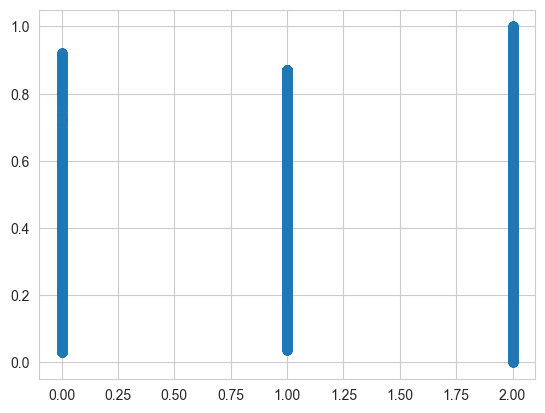

In [285]:
plt.scatter(y =df['HR'], x= df['label'])
plt.show()

#  HR-TEMP PLOT

<AxesSubplot: xlabel='HR', ylabel='TEMP'>

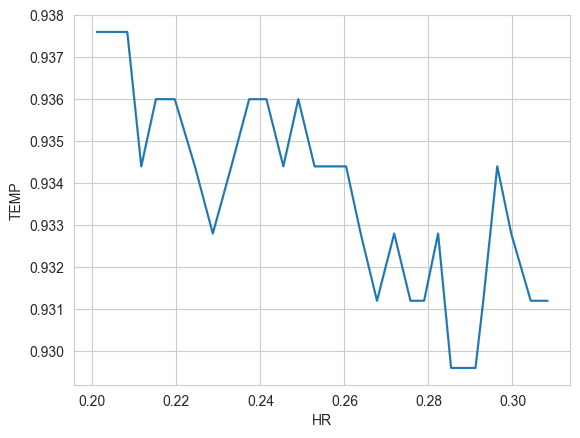

In [126]:
sns.lineplot(data=df, x=df['HR'].head(1000), y=df['TEMP'].head(1000))

# HR-EDA PLOT

<AxesSubplot: xlabel='HR', ylabel='EDA'>

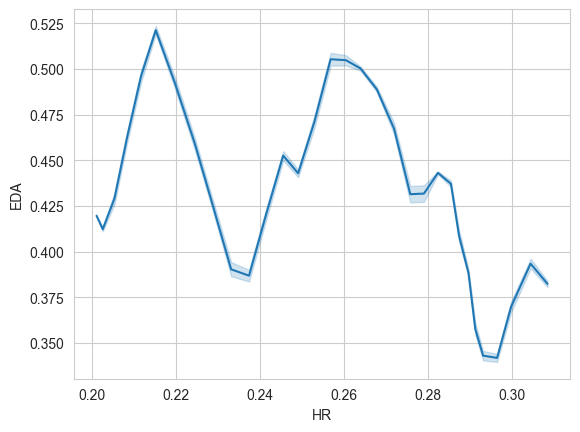

In [135]:
sns.lineplot(data=df, x=df['HR'].head(1000), y=df['EDA'].head(1000))

# TEMP-EDA PLOT

<AxesSubplot: xlabel='TEMP', ylabel='EDA'>

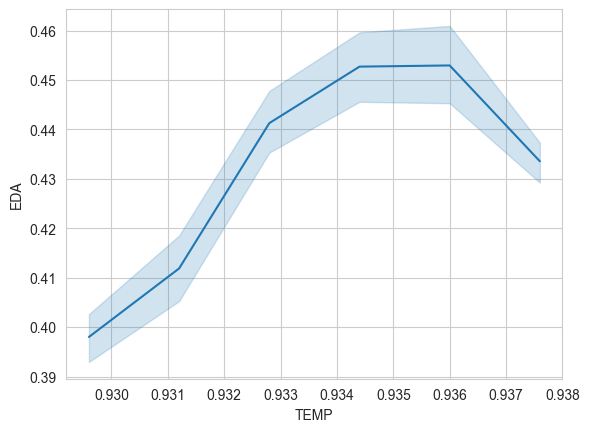

In [136]:
sns.lineplot(data=df, x=df['TEMP'].head(1000), y=df['EDA'].head(1000))

# Min max scaling


In [6]:
scaler = MinMaxScaler()

In [7]:
# transform data
df.iloc[:, :6] = scaler.fit_transform(df.iloc[:, :6])

In [8]:
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,0.219608,0.768627,0.352941,0.383261,0.308365,0.9312,94,2020-05-10 23:55:00.000000000,2.0
1,0.431373,0.792157,0.419608,0.383261,0.308365,0.9312,94,2020-05-10 23:55:00.031249920,2.0
2,0.435294,0.772549,0.360784,0.383261,0.308365,0.9312,94,2020-05-10 23:55:00.062500096,2.0
3,0.396078,0.725490,0.423529,0.383261,0.308365,0.9312,94,2020-05-10 23:55:00.093750016,2.0
4,0.529412,0.741176,0.505882,0.383261,0.308365,0.9312,94,2020-05-10 23:55:00.124999936,2.0


In [12]:
# Split the data into inputs and targets

X = df.drop("label", axis=1)
y = df["label"]

In [13]:
numerical_cols = ["X", "Y", "Z", "EDA", "HR", "TEMP"]

X_num = X[numerical_cols]

In [14]:
# split dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.33, random_state=30)

In [15]:
df_small = df.sample(frac=0.01, random_state=42)
X_small = df.drop("label", axis=1)
X_num_small = X_small[numerical_cols]
y_small = df["label"]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_num_small, y_small, test_size=0.33, random_state=30)

# 10-fold Cross-Validation with Random Forest Classification

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(rf, X_scaled, y, cv=cv)

In [33]:
scores

array([0.99695284, 0.99706405, 0.9969789 , 0.99706666, 0.99698933,
       0.9970319 , 0.9970041 , 0.9970458 , 0.99716397, 0.997018  ])

In [8]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf.predict(X_test)

# Accuracy, Confusion Matrix for Random Forest Classifier


Confusion Matrix


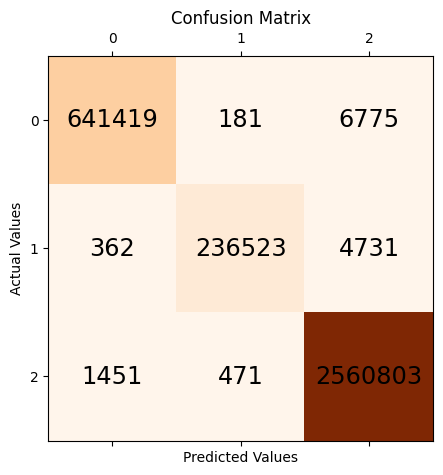


F1 Score
0.9928656109757751

Recall
0.9891475852174224

Precision
0.9966531240996481

Accuracy
0.9959536202803821

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      0.99      0.99    648375
     Class 2       1.00      0.98      0.99    241616
     Class 3       1.00      1.00      1.00   2562725

    accuracy                           1.00   3452716
   macro avg       1.00      0.99      0.99   3452716
weighted avg       1.00      1.00      1.00   3452716



In [16]:
# confusion matrix for multi class classification
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix')

# plot of the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# f1 score
f1score = f1_score(y_test, y_pred, average = 'macro')
print('\nF1 Score')
print(f1score)

# recall score
recall = recall_score(y_test, y_pred, average = 'macro')
print('\nRecall')
print(recall)

# precision score
precision = precision_score(y_test, y_pred, average = 'macro')
print('\nPrecision')
print(precision)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy')
print(accuracy)

# classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

# XGBOOST

In [11]:
clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

In [12]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

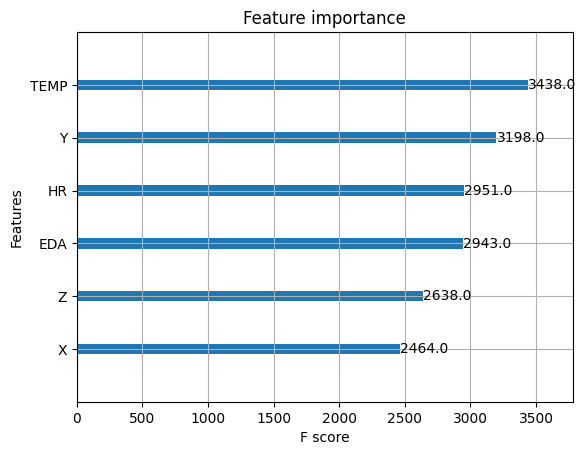

In [13]:
xgb.plot_importance(clf, ax=plt.gca())

In [14]:
y_pred_xgb = clf.predict(X_test)

# Accuracy, Confusion Matrix for XGBOOST


Confusion Matrix


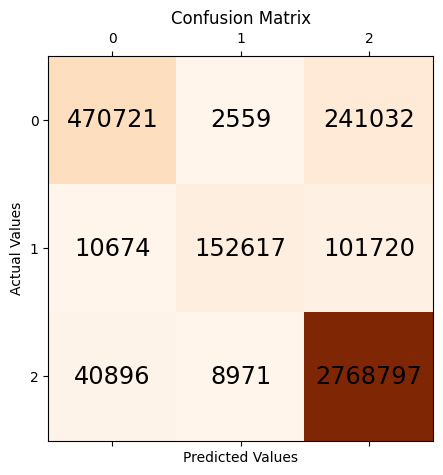


F1 Score
0.8021152354869199

Recall
0.739060912371522

Precision
0.9069550804827142

Accuracy
0.8931402345505659

Classification Report

              precision    recall  f1-score   support

     Class 1       0.90      0.66      0.76    714312
     Class 2       0.93      0.58      0.71    265011
     Class 3       0.89      0.98      0.93   2818664

    accuracy                           0.89   3797987
   macro avg       0.91      0.74      0.80   3797987
weighted avg       0.89      0.89      0.89   3797987



In [15]:
# confusion matrix for multi class classification
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('\nConfusion Matrix')

# plot of the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# f1 score
f1score = f1_score(y_test, y_pred_xgb, average = 'macro')
print('\nF1 Score')
print(f1score)

# recall score
recall = recall_score(y_test, y_pred_xgb, average = 'macro')
print('\nRecall')
print(recall)

# precision score
precision = precision_score(y_test, y_pred_xgb, average = 'macro')
print('\nPrecision')
print(precision)

# accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print('\nAccuracy')
print(accuracy)

# classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_xgb, target_names=['Class 1', 'Class 2', 'Class 3']))

# Logistic Regression

In [19]:
# Define the logistic regression model
lr = LogisticRegression(random_state=42)

# Train the model on the training data
lr.fit(X_train_small, y_train_small)

LogisticRegression(random_state=42)

In [27]:
y_pred_logreg = lr.predict(X_test_small)

# Accuracy of Logistic Regression

In [28]:
# accuracy score
accuracy = accuracy_score(y_test_small, y_pred_logreg)
print('\nAccuracy')
print(accuracy)

# f1 score
f1score = f1_score(y_test_small, y_pred_logreg, average = 'macro')
print('\nF1 Score')
print(f1score)

# recall score
recall = recall_score(y_test_small, y_pred_logreg, average = 'macro')
print('\nRecall')
print(recall)

# precision score
precision = precision_score(y_test_small, y_pred_logreg, average = 'macro')
print('\nPrecision')
print(precision)


Accuracy
0.7421070688235636

F1 Score
0.28399202766631304

Recall
0.33331686973421343

Precision
0.25571242669382604


/Users/emregol/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix for multi class classification
conf_matrix = confusion_matrix(y_test_small, y_pred_logreg)
print('\nConfusion Matrix')

# plot of the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [33]:
# Define the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dtc.fit(X_train_small, y_train_small)

DecisionTreeClassifier(random_state=42)

In [34]:
# Use the trained classifier to predict labels for the test data
y_pred_dectree = dtc.predict(X_test_small)

In [36]:
# accuracy score
accuracy = accuracy_score(y_test_small, y_pred_dectree)
print('\nAccuracy')
print(accuracy)

# f1 score
f1score = f1_score(y_test_small, y_pred_dectree, average = 'macro')
print('\nF1 Score')
print(f1score)

# recall score
recall = recall_score(y_test_small, y_pred_dectree, average = 'macro')
print('\nRecall')
print(recall)

# precision score
precision = precision_score(y_test_small, y_pred_dectree, average = 'macro')
print('\nPrecision')
print(precision)


Accuracy
0.9923080305435484

F1 Score
0.9863811619629654

Recall
0.9866714260201054

Precision
0.9860914272261981


# LSTM

In [33]:
time_steps = 10

In [40]:
model = Sequential()
model.add(LSTM(64, input_shape=(6,1)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [41]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [42]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [43]:
# Fit model
history = model.fit(X_train_small, y_train_small, epochs=10, batch_size=64, validation_data=(X_test_small, y_test_small))

Epoch 1/10


2023-04-23 21:34:07.077654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 21:34:07.274846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 21:34:07.731901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120486/120486 [==============================] - ETA: 0s - loss: 0.4009

2023-04-23 21:47:36.912391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 21:47:36.955946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120486/120486 [==============================] - 1002s 8ms/step - loss: 0.4009 - val_loss: 0.3571
Epoch 2/10
120486/120486 [==============================] - 981s 8ms/step - loss: 0.3360 - val_loss: 0.3502
Epoch 3/10
120486/120486 [==============================] - 985s 8ms/step - loss: 0.3170 - val_loss: 0.3261
Epoch 4/10
120486/120486 [==============================] - 1028s 9ms/step - loss: 0.3065 - val_loss: 0.3106
Epoch 5/10
120486/120486 [==============================] - 1013s 8ms/step - loss: 0.2993 - val_loss: 0.3109
Epoch 6/10
120486/120486 [==============================] - 1039s 9ms/step - loss: 0.2939 - val_loss: 0.3117
Epoch 7/10
120486/120486 [==============================] - 1013s 8ms/step - loss: 0.2896 - val_loss: 0.2963
Epoch 8/10
120486/120486 [==============================] - 977s 8ms/step - loss: 0.2862 - val_loss: 0.2924
Epoch 9/10
120486/120486 [==============================] - 976s 8ms/step - loss: 0.2836 - val_loss: 0.2950
Epoch 10/10
120486/120486 [=======

In [44]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________
